In [1]:
1210-2155
#비싼 아파트가 거래가 잘 된다.

-945

In [2]:
#클러스터__ 평당가
# ### 평당분양가. 1
# 1년 동안의 아파트 가격의 변동을 일으키는 팩터는 무엇인가?


In [43]:
import numpy as np
import pandas as pd
from datetime import timedelta, date, datetime
pd.options.display.float_format = '{:.4f}'.format
pd.options.display.float_format = '{:,.0f}'.format

from datetime import timedelta, date, datetime 

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
font_location = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
mpl.rc('font', family=font_name)
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 16, 10coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values,
                    test[['pickup_latitude', 'pickup_longitude']].values,
                    test[['dropoff_latitude', 'dropoff_longitude']].values))



In [4]:
rpath ='/home/bono/local_drive_u/117_apt/'
#train_df = pd.read_csv(rpath + 'train.csv', skiprows= 1000000)
train_df = pd.read_csv(rpath + 'train.csv')
test_df = pd.read_csv(rpath +  'test.csv')

# 데이터 전처리
+ 주소코드로 동, 구 붙이기
+ 연도별 데이터를 str에서 datetime 형으로 바꾸기
+ missing data 처리

+ 주소코드로 동, 구 붙이기  
외부에서 법정코드를 다운 받아서 dataset에 추가했음 

In [5]:
adr_df = pd.read_csv(rpath +  'addr_code2.csv' , encoding="cp949")
adr_df = adr_df[adr_df.state =='존재']
ad_sb_df = pd.concat([adr_df[adr_df['name'].str.contains('서울')], adr_df[adr_df['name'].str.contains('부산')]])
ad_sb_df['bcode']= ad_sb_df.code.astype(str).str[:4]
ad_sb_b_df = ad_sb_df[ad_sb_df.code.astype(str).str[4:] == '000000']
ad_sb_b_df = pd.concat([ad_sb_b_df,ad_sb_df[ad_sb_df['code'].isin([1121500000,1130500000,1154500000])]])
ad_sb_b_df.rename(columns = {'name':'bname'} ,inplace = True)
ad_sb_dfx  = ad_sb_df.merge(ad_sb_b_df[['bcode','bname']], on = 'bcode')
train_df = train_df.merge(ad_sb_dfx[['code','bcode','name','bname']], left_on = 'address_by_law',  right_on= 'code')

test_df = test_df.merge(ad_sb_dfx[['code','bcode','name','bname']], left_on = 'address_by_law',  right_on= 'code')

+ 연도별 데이터를 str에서 datetime 형으로 바꾸기  
거래년월과 거래일(1-10, 11-20, 21-31)을 조인해서 거래일을 datetime로 설정

In [6]:
def number_to_date(_yyyymm, day2):
    str_yyyymm = str(_yyyymm)
    #print(str_yyyymm)
    str_yyyy = str_yyyymm[:4]
    str_mm = str_yyyymm[4:]
    #print(str_mm)
    
    if day2 == '1~10':
        str_dd = '01'
    elif day2 == '11~20':
        str_dd = '11'
    else: 
        str_dd = '21'
    strptype = str_yyyy +'-'+str_mm + '-' + str_dd
    candy_day = datetime.strptime(strptype, '%Y-%m-%d')
    return (candy_day)
    
#number_to_date(200601, '11~20')

In [7]:
train_df['date_trans'] = train_df[['transaction_year_month','transaction_date']].apply(lambda cols: number_to_date(*cols), axis = 1 )
train_df['date_trans'] = pd.to_datetime(train_df['date_trans'])

In [8]:
train_df.rename(columns = {'transaction_real_price':'TARGET'}, inplace = True)

In [76]:

train_df['supply_py']= train_df['supply_area'] * 0.3025
train_df['price_per'] = train_df['TARGET'] / train_df['supply_py'] 

In [9]:
train_df['city'] = train_df['city'].map({0:'부산',1:'서울'})


In [10]:
train_df['apt_use_year'] = train_df['transaction_year_month'].map(str).str[:4].map(int) - train_df['year_of_completion']
test_df['apt_use_year'] = test_df['transaction_year_month'].map(str).str[:4].map(int) - test_df['year_of_completion']
#- train_df['year_of_completion']

In [11]:
#train_df(train_df.isnull())\



#https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling
#https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard#

In [42]:
train_df.isnull().sum().to_frame('x1').query('x1 > 0')

,x1
total_parking_capacity_in_site,91813
tallest_building_in_sites,9
lowest_building_in_sites,9
heat_type,2017
heat_fuel,9667
room_count,691
bathroom_count,691
front_door_structure,13892


# 시계열 탐색
- 서울과 부산의 연도별 아파트 가격의 평균, 4분의 데이터

- 구별 월별 아파트 가격의 평균

In [13]:
#train_df

In [14]:
#pd.options.display.float_format = '{:.2f}'.format
pd.options.display.float_format = '{:,.0f}'.format
grouped1 = train_df.groupby([train_df['date_trans'].dt.to_period("Y"), 'city'])['TARGET'].agg(['mean','min','max','std','count'])
grouped2 = train_df.groupby([train_df['date_trans'].dt.to_period("Y"), 'city'])['TARGET'].quantile([.25, .5, .75]).unstack()


In [15]:
pd.options.display.float_format = '{:,.0f}'.format
#grouped1.join(grouped2).unstack(level = -1).swaplevel(i=-2, j=-1, axis = 1).sort_index(axis =1)
grouped1.join(grouped2).unstack(level = -1)

mean                   min                    max  \
city                부산          서울        부산         서울          부산   
date_trans                                                            
2006       131,760,772 346,633,790   8000000   19500000  1140000000   
2007       142,609,711 326,188,965  10000000   44000000  1500000000   
2008       147,433,188 408,783,751  14000000   10000000  1993300000   
2009       177,841,750 509,568,275  10000000   11000000  1689400000   
2010       199,275,659 508,903,397  14000000   32000000  2137000000   
2011       251,117,724 467,131,559  13000000   10000000  2600000000   
2012       247,811,379 467,046,261  12000000   65000000  3858400000   
2013       242,594,432 461,064,466  10000000   92000000  4045300000   
2014       262,538,199 475,132,068  14000000   90000000  4127870000   
2015       287,140,114 497,416,668   7290000    7000000  3798400000   
2016       315,715,492 567,399,868  16500000   30000000  2780670000   
2017       334,984,001 657,721,423  13000000  105000000  3798400000   
2018       335,177,717 697,025,060  18000000  120000000  4143400000   

                               std              count                0.25  \
city                서울          부산          서울     부산      서울          부산   
date_trans                                                                  
2006        5360000000  89,476,330 279,801,162  33118  112575  77,310,000   
2007        4900000000  95,037,672 249,909,989  39263   51476  81,100,000   
2008        5700000000  94,389,111 247,895,926  45483   51908  84,000,000   
2009        5650000000 116,370,911 336,895,143  59198   70662  97,000,000   
2010        5150000000 121,752,963 343,733,621  61362   42743 117,500,000   
2011        4380000000 147,518,391 296,163,635  46001   53329 150,000,000   
2012        4444500000 185,930,397 301,429,774  29633   40283 148,500,000   
2013        4600000000 142,423,917 286,679,075  44865   69478 157,000,000   
2014        6565000000 168,934,174 301,419,374  55961   87027 164,000,000   
2015        7700000000 184,225,305 306,343,561  67743  120491 172,000,000   
2016        8200000000 193,712,621 356,384,762  60139  115727 186,000,000   
2017        7800000000 218,486,195 422,124,881  37577  111673 185,000,000   
2018        7400000000 206,834,487 460,485,017  19743   74000 196,750,000   

                               0.5                    0.75              
city                서울          부산          서울          부산          서울  
date_trans                                                              
2006       176,500,000 104,010,000 268,000,000 160,000,000 415,000,000  
2007       174,000,000 114,000,000 263,000,000 180,000,000 390,000,000  
2008       260,000,000 123,000,000 350,000,000 184,000,000 480,000,000  
2009       300,000,000 149,000,000 410,000,000 223,500,000 615,000,000  
2010       292,000,000 170,000,000 407,000,000 250,000,000 605,000,000  
2011       283,000,000 219,000,000 386,000,000 315,000,000 550,000,000  
2012       275,000,000 200,000,000 380,000,000 290,000,000 560,000,000  
2013       285,000,000 210,000,000 380,000,000 299,000,000 540,000,000  
2014       298,000,000 230,000,000 397,000,000 318,000,000 553,000,000  
2015       315,000,000 249,000,000 420,000,000 353,000,000 580,000,000  
2016       355,000,000 271,000,000 480,000,000 395,000,000 662,500,000  
2017       399,000,000 280,000,000 543,000,000 418,000,000 770,000,000  
2018       414,000,000 286,000,000 570,000,000 413,000,000 820,000,000

In [16]:
df2 = grouped1.join(grouped2).unstack(level = -1)

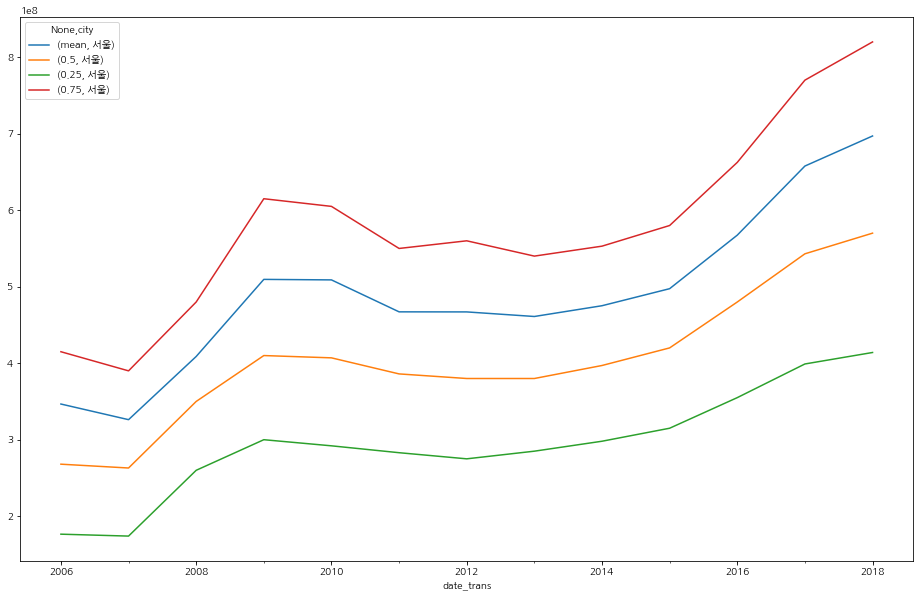

In [48]:

df2.loc[:, (slice(None),['서울'])][['mean', 0.5, 0.25, 0.75]].plot()

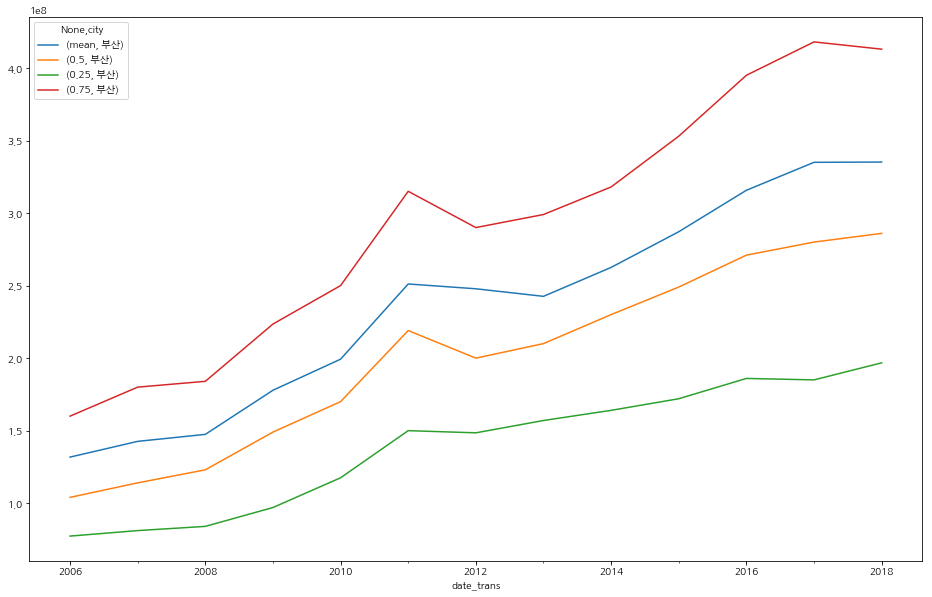

In [49]:
df2.loc[:, (slice(None),['부산'])][['mean', 0.5, 0.25, 0.75]].plot()

## 요인별 탐색
+ 수치형 변수
    - 건축연도 또는 아파트 사용연수 
    - 공급면적,

+ 명목형 변수

In [25]:
#train_df.select_dtypes(exclude=['object']).dtypes

num_cols = ['year_of_completion', 'exclusive_use_area','supply_area','room_count','bathroom_count','total_parking_capacity_in_site'
,'total_household_count_in_sites', 'apartment_building_count_in_sites','tallest_building_in_sites','lowest_building_in_sites','floor','apt_use_year']

cat_cols = ['apartment_id', 'city', 'transaction_year_month','transaction_date', 'address_by_law','tran_yymmd','bcode','heat_type','heat_fuel', 'front_door_structure']
non_use = ['key','apartment_id','latitude','longitude','room_id','date_trans']

cat_cols_small = ['heat_type','heat_fuel', 'front_door_structure']

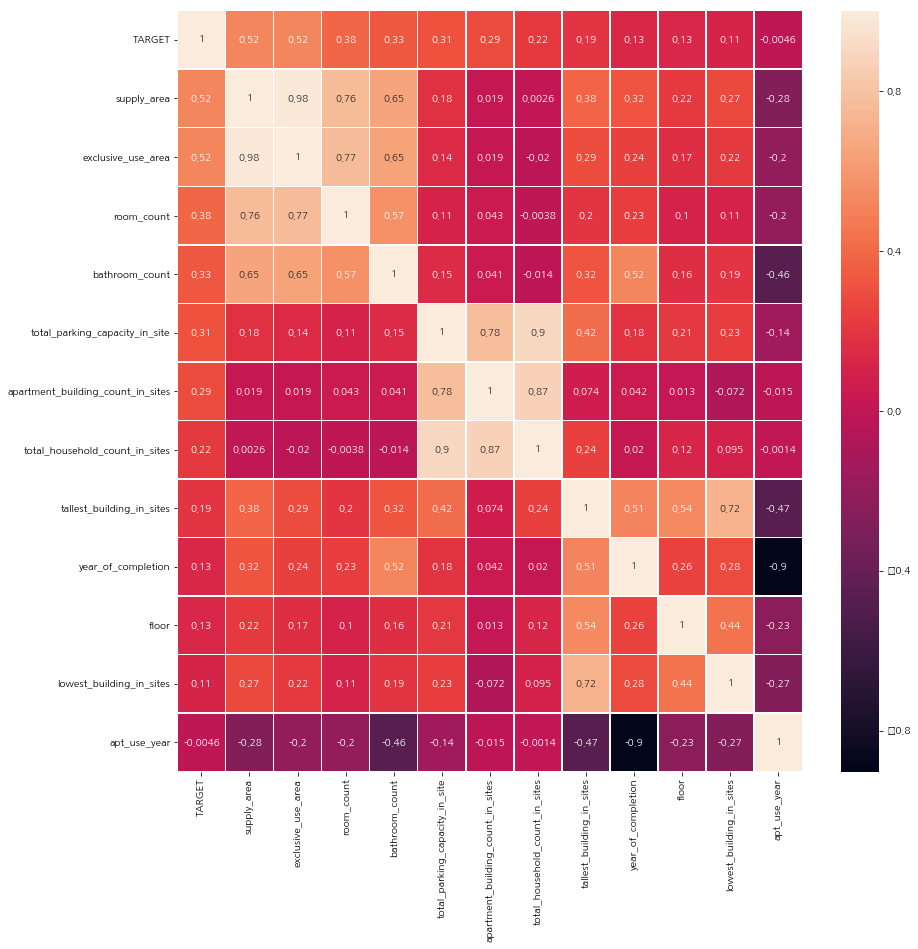

In [27]:
train_df[['TARGET'] + num_cols ].corr()['TARGET'].sort_values(ascending = False).index
cor_matx  = train_df[train_df[['TARGET'] + num_cols ].corr()['TARGET'].sort_values(ascending = False).index ].corr()

fig, ax = plt.subplots(figsize=(14,14))   
sns.heatmap(cor_matx, annot=True, linewidths=.5, ax=ax)
# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

plt.show()

In [ ]:
#cat_cols

In [28]:
for col in cat_cols_small:
    print('columns:', col )
    print(train_df[col].unique())    

columns: heat_type
['individual' 'central' nan 'district']
columns: heat_fuel
['gas' nan 'cogeneration' '-']
columns: front_door_structure
['corridor' 'stairway' 'mixed' nan '-']


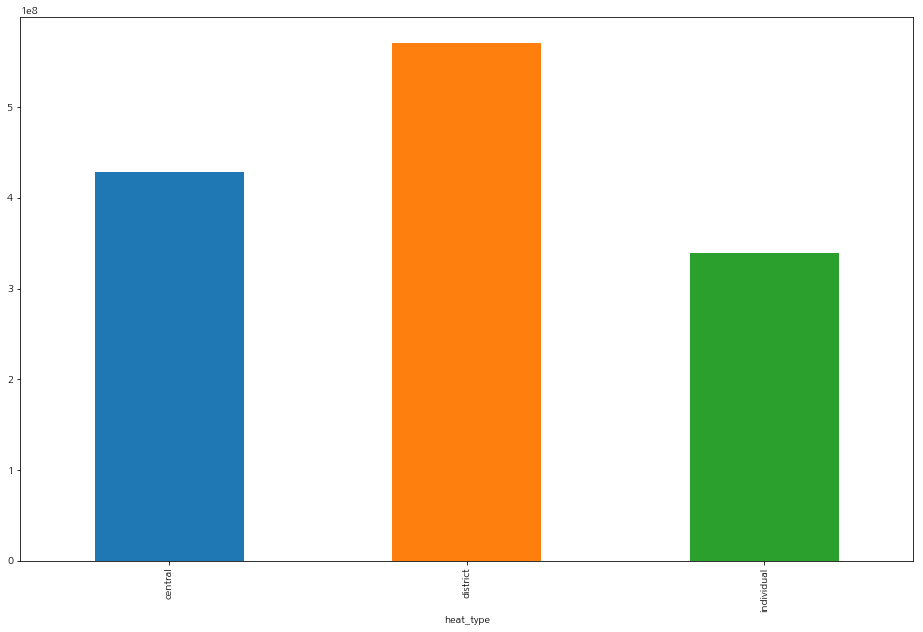

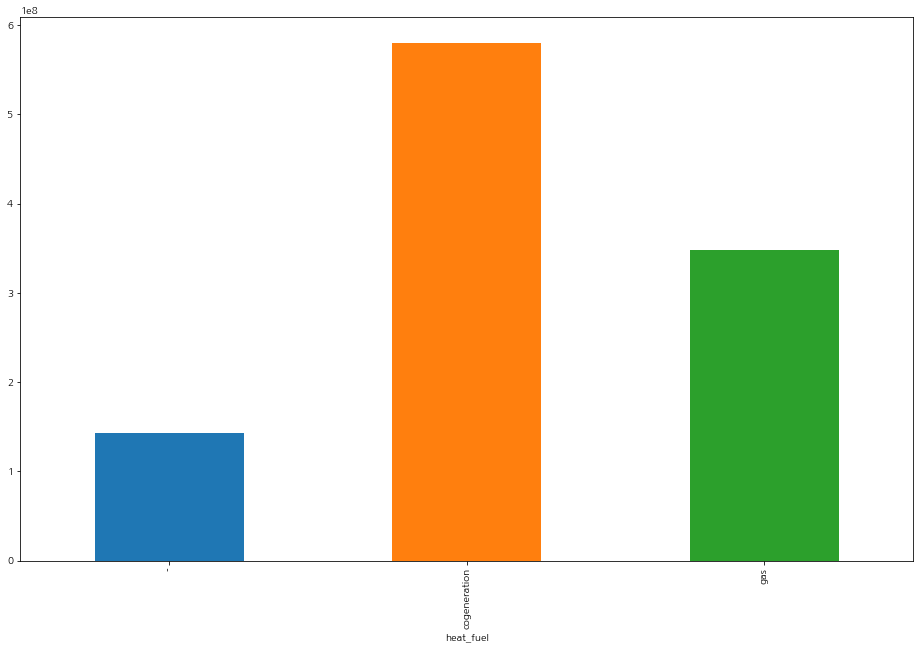

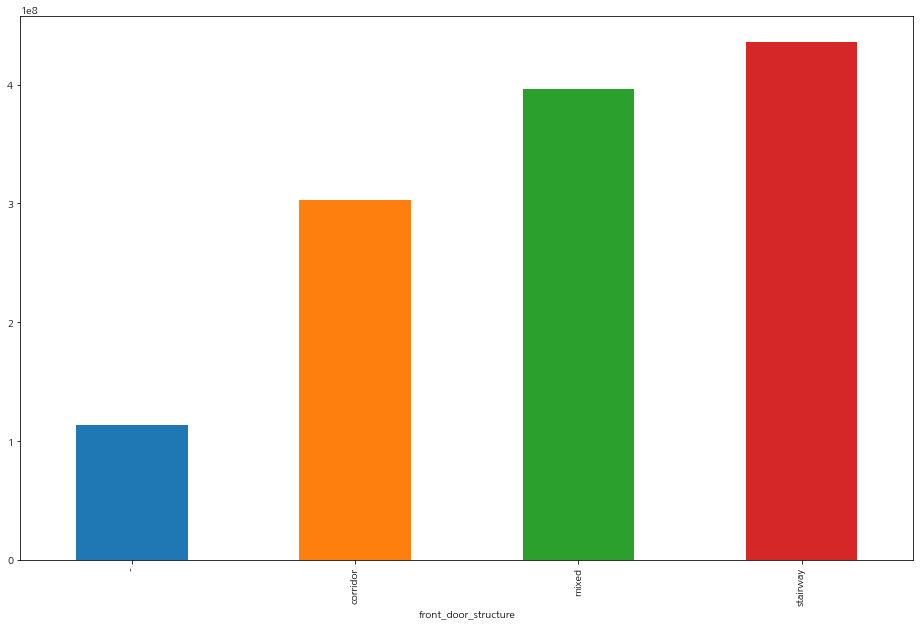

In [69]:
for col in cat_cols_small:
    (train_df.groupby([col])['TARGET'].mean()).plot(kind = 'bar' , sharey  = True)
    #plt.annotate()
    plt.show()

In [ ]:
train_df.groupby(['heat_type'])['TARGET'].mean()

columns: individual
columns: central
columns: district


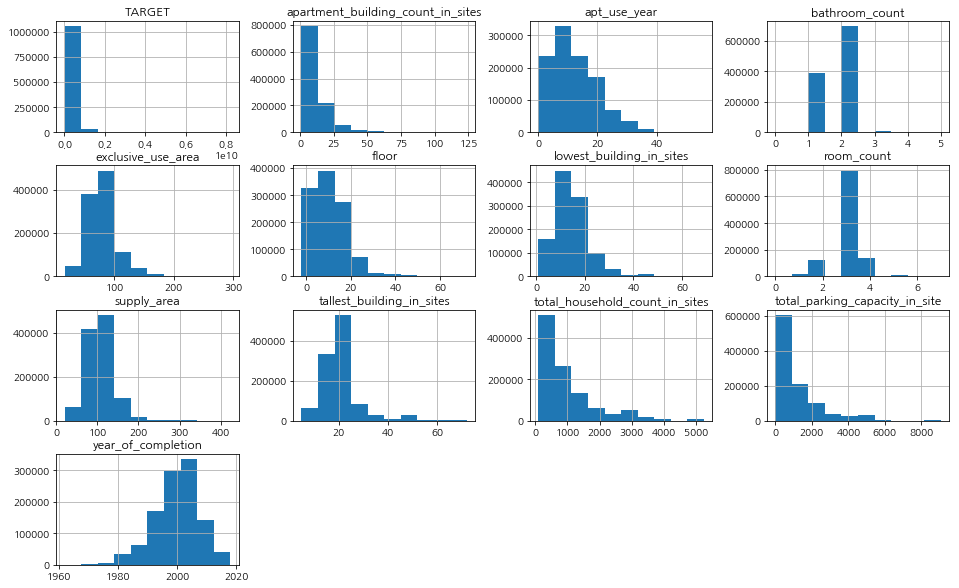

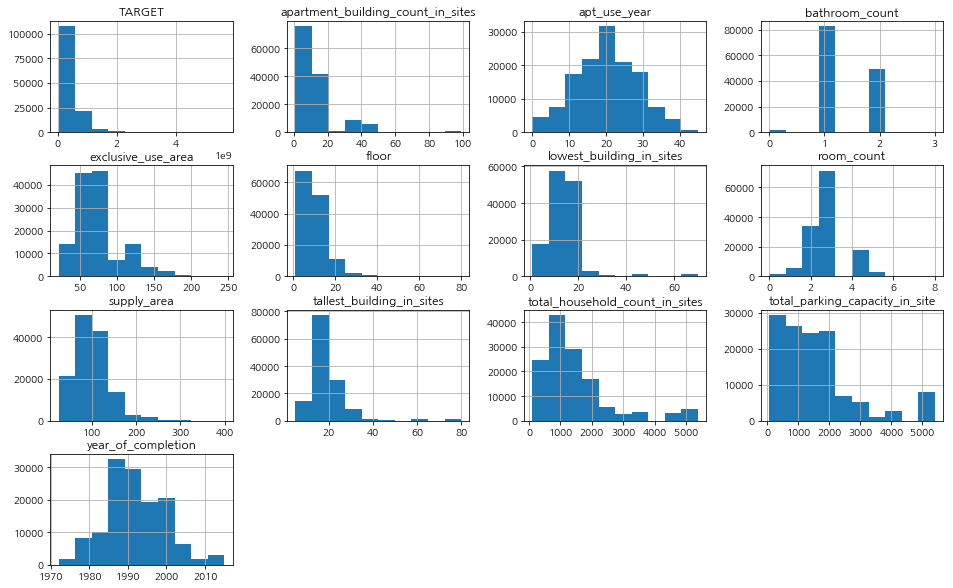

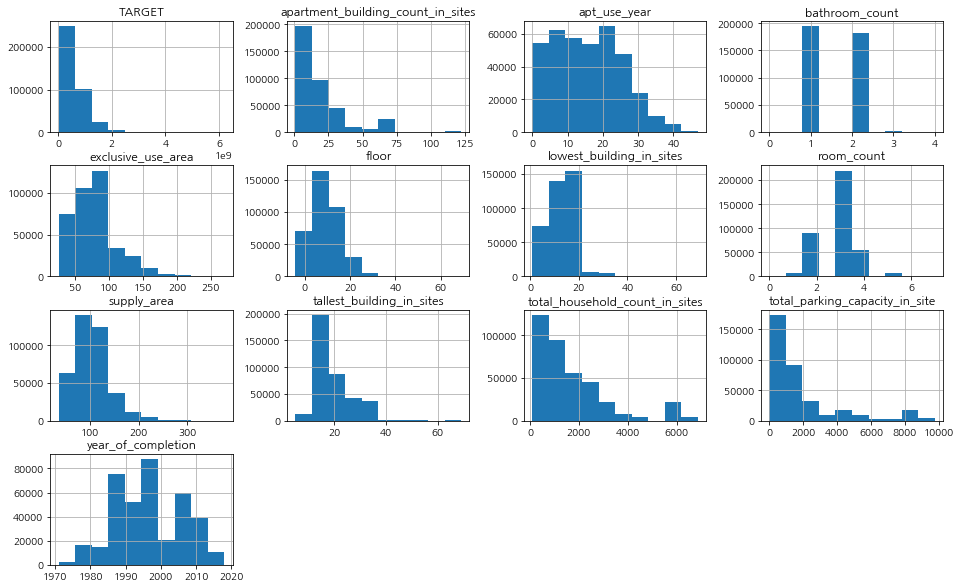

In [72]:
for a in train_df.heat_type.unique():
    
    #print(type(a))
    #if a != 'nan':
    #if np.isNaN(a):
    #if (type(a))
    if isinstance(a, str):
        print("columns:", a)
        train_df[train_df['heat_type']== a][['TARGET'] + num_cols].hist()
        plt.plot()

# 지역별 탐색

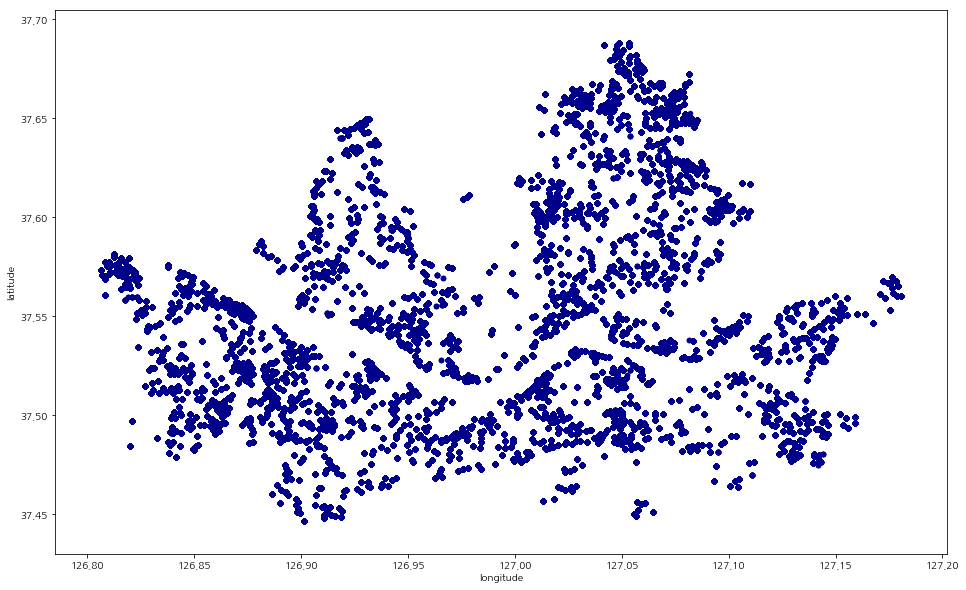

In [73]:
train_df[train_df['city'] == '서울'][['longitude','latitude']].plot.scatter(y= 'latitude', x = 'longitude', c='DarkBlue')

In [81]:
coords = np.vstack((train_df[['longitude', 'latitude']].values))



In [83]:
#sample_ind = np.random.permutation(len(coords))[:500000]
from sklearn.cluster import MiniBatchKMeans
coords = np.vstack((train_df[['longitude', 'latitude']].values))
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])

In [85]:
train_df.loc[:, 'dis_cluster'] = kmeans.predict(train_df[['longitude', 'latitude']])

In [90]:
train_df1.columns

Index(['key', 'apartment_id', 'city', 'transaction_year_month',
       'transaction_date', 'year_of_completion', 'exclusive_use_area', 'floor',
       'latitude', 'longitude', 'address_by_law',
       'total_parking_capacity_in_site', 'total_household_count_in_sites',
       'apartment_building_count_in_sites', 'tallest_building_in_sites',
       'lowest_building_in_sites', 'heat_type', 'heat_fuel', 'room_id',
       'supply_area', 'total_household_count_of_area_type', 'room_count',
       'bathroom_count', 'front_door_structure', 'TARGET', 'code', 'bcode',
       'name', 'bname', 'date_trans', 'apt_use_year', 'supply_py', 'price_per',
       'dis_cluster'],
      dtype='object')

In [153]:
train_df1 = train_df[(train_df['date_trans'] > datetime(2018, 1,1)) & (train_df['city'] == '서울')]

In [88]:
train_df1 = train_df[train_df['city'] == '서울']

In [155]:
#train_df1['price_per']

In [156]:
#print
train_df1['clus_qcut'] = pd.qcut( train_df1['price_per'], 9, labels = np.arange(9, 0  ,-1))
#df_c['cut'] = pd.cut( df_c[0], bins)

/home/bono/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


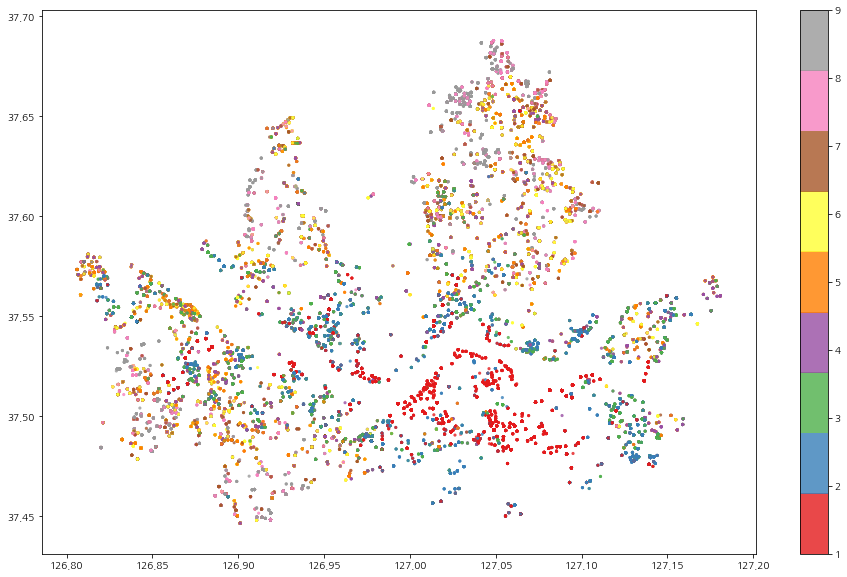

In [161]:
#fig, ax = plt.subplots(ncols=1, nrows=1)
plt.scatter(train_df1.longitude.values, train_df1.latitude.values, s=10, lw=0, c=train_df1.clus_qcut.values, cmap='Set1', alpha=0.8)
plt.colorbar()

In [ ]:
plt.scatter(train_df1[train_df1.bcode == a].longitude.values, train_df1[train_df1.bcode == a].latitude.values, s=10, lw=0, c=train_df1[train_df1.bcode == a].clus_qcut.values, cmap='tab10', alpha=0.2)

In [170]:
a = 1121

In [208]:
train_df1.bcode.unique()

array(['1111', '1114', '1121', '1117', '1120', '1126', '1123', '1130',
       '1129', '1138', '1132', '1141', '1144', '1154', '1153', '1135',
       '1150', '1147', '1162', '1156', '1159', '1168', '1174', '1165',
       '1171'], dtype=object)

In [212]:
train_df1.bname.unique()

array(['서울특별시 종로구', '서울특별시 중구', '서울특별시 광진구', '서울특별시 용산구', '서울특별시 성동구',
       '서울특별시 중랑구', '서울특별시 동대문구', '서울특별시 강북구', '서울특별시 성북구', '서울특별시 은평구',
       '서울특별시 도봉구', '서울특별시 서대문구', '서울특별시 마포구', '서울특별시 금천구', '서울특별시 구로구',
       '서울특별시 노원구', '서울특별시 강서구', '서울특별시 양천구', '서울특별시 관악구', '서울특별시 영등포구',
       '서울특별시 동작구', '서울특별시 강남구', '서울특별시 강동구', '서울특별시 서초구', '서울특별시 송파구'],
      dtype=object)

In [224]:
# la = train_df1[train_df1.bcode == a].longitude.values
# lo = train_df1[train_df1.bcode == a].latitude.values
# color=train_df1[train_df1.bcode == a].clus_qcut.values


In [229]:
# #lo.shape

# df_135 = train_df1[train_df1.bcode == '1150'][ ['longitude','latitude','clus_qcut']]
# colordict = {1:'red', 2:'blue', 3: 'green',4:'purple', 5:'orange',6:'yellow', 7:'maroon',8:'pink', 9:'grey'}
# map_osm = folium.Map(location=[df_135['latitude'].mean(), df_135['longitude'].mean()], zoom_start=13)
# #df_135.apply(lambda row:folium.Marker(location=[row["latitude"], row["longitude"]], popup=folium.Popup(row["clus_qcut"])).add_to(map_osm), axis=1)
# df_135.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], radius =2 , color = colordict[row["clus_qcut"]]).add_to(map_osm), axis=1)
# map_osm

In [188]:
# import folium
# map_osm = folium.Map(location=[37.5, 127], zoom_start=11)
# folium.CircleMarker(location= [la, lo], radius=7, fill_color=('green'))
# map_osm

In [242]:
train_df[train_df['apt_use_year'] < 25].shape

(1401185, 34)

In [258]:
train_df.columns

Index(['key', 'apartment_id', 'city', 'transaction_year_month',
       'transaction_date', 'year_of_completion', 'exclusive_use_area', 'floor',
       'latitude', 'longitude', 'address_by_law',
       'total_parking_capacity_in_site', 'total_household_count_in_sites',
       'apartment_building_count_in_sites', 'tallest_building_in_sites',
       'lowest_building_in_sites', 'heat_type', 'heat_fuel', 'room_id',
       'supply_area', 'total_household_count_of_area_type', 'room_count',
       'bathroom_count', 'front_door_structure', 'TARGET', 'code', 'bcode',
       'name', 'bname', 'date_trans', 'apt_use_year', 'supply_py', 'price_per',
       'dis_cluster'],
      dtype='object')

In [337]:
train_re = train_df[(train_df['year_of_completion'] < 1982) & (train_df['bname'].isin(['서울특별시 서초구','서울특별시 강남구','서울특별시 강동구','서울특별시 송파구']))]

In [350]:
test_re = test_df[(test_df['year_of_completion'] < 1982) & (test_df['bname'].isin(['서울특별시 서초구','서울특별시 강남구','서울특별시 강동구','서울특별시 송파구']))]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [352]:
train_df['recons'] = train_df[['year_of_completion','bname']].apply(lambda cols: 1  if (cols[0] < 1982) & (cols[1] in (['서울특별시 서초구','서울특별시 강남구','서울특별시 강동구','서울특별시 송파구']))   else 0 ,  axis = 1   )

In [314]:
a1 = train_df[train_df['year_of_completion'] < 1982].groupby(['bname'])['price_per'].agg(['mean', 'count']).sort_values('mean')
a2 = train_df[train_df['year_of_completion'] > 1982].groupby(['bname'])['price_per'].agg(['mean', 'count']).sort_values('mean')
a1.join(a2, rsuffix='_2')

,mean,count,mean_2,count_2
bname,,,,
부산광역시 중구,"3,686,447",119,"4,850,387",1127
부산광역시 남구,"4,462,178",500,"7,248,323",68589
부산광역시 영도구,"4,548,689",583,"5,071,572",12472
부산광역시 사하구,"5,082,475",732,"5,134,970",58694
부산광역시 사상구,"5,139,291",171,"5,209,793",40419
부산광역시 부산진구,"5,272,203",2262,"6,598,951",54964
부산광역시 연제구,"5,732,121",1362,"7,532,191",29974
부산광역시 동구,"5,801,512",661,"7,413,844",4581
부산광역시 해운대구,"5,994,547",3635,"8,756,015",120990


,mean,count,mean_2,count_2
bname,,,,
부산광역시 중구,"4,340,537",144,"4,968,447",990
부산광역시 영도구,"4,841,485",587,"5,069,085",11748
부산광역시 동구,"5,850,136",621,"7,517,796",4425
부산광역시 사하구,"5,851,226",1165,"5,104,566",55377
부산광역시 사상구,"6,183,354",592,"5,113,281",36329
부산광역시 기장군,"6,387,039",42,"6,296,650",25142
부산광역시 부산진구,"6,433,288",2509,"6,569,209",49757
부산광역시 북구,"7,234,259",1477,"6,029,681",65987
부산광역시 해운대구,"7,595,654",2970,"8,813,380",117206


In [295]:
df_recon1 = train_df[(train_df['apt_use_year'] > 30)  & (train_df['bname'] =='서울특별시 강남구')] 

In [310]:
t1  = train_df[(train_df['year_of_completion'] < 1980)  & (train_df['bname'] =='서울특별시 강남구')] 

In [311]:
t1.groupby('apartment_id')['price_per'].agg(['count','mean']).sort_values('count', ascending = False )

,count,mean
apartment_id,,
946,1647,"32,015,850"
10779,539,"45,674,991"
1621,525,"39,006,031"
92,360,"42,736,456"
10776,224,"38,213,481"
1623,143,"40,566,209"
288,129,"25,934,393"
10778,128,"42,660,775"
5346,118,"38,908,897"


In [298]:
df_recon1.groupby('apartment_id')['price_per'].agg(['count','mean']).sort_values('count', ascending = False )

,count,mean
apartment_id,,
2982,1707,"67,196,772"
946,1703,"33,098,953"
1061,810,"61,714,330"
1077,436,"38,199,967"
1083,436,"35,669,726"
1621,436,"40,106,031"
10779,426,"45,571,395"
33076,330,"40,362,954"
92,324,"42,999,301"


In [ ]:
##  재개발 아파트 

In [271]:
df_recon1.columns

Index(['key', 'apartment_id', 'city', 'transaction_year_month',
       'transaction_date', 'year_of_completion', 'exclusive_use_area', 'floor',
       'latitude', 'longitude', 'address_by_law',
       'total_parking_capacity_in_site', 'total_household_count_in_sites',
       'apartment_building_count_in_sites', 'tallest_building_in_sites',
       'lowest_building_in_sites', 'heat_type', 'heat_fuel', 'room_id',
       'supply_area', 'total_household_count_of_area_type', 'room_count',
       'bathroom_count', 'front_door_structure', 'TARGET', 'code', 'bcode',
       'name', 'bname', 'date_trans', 'apt_use_year', 'supply_py', 'price_per',
       'dis_cluster'],
      dtype='object')

In [226]:
# for a in train_df1.bcode.unique():
#     print(a)
#     #print(train_df1[train_df1.bcode == a].longitude.values)
#     plt.scatter(train_df1[train_df1.bcode == a].longitude.values, train_df1[train_df1.bcode == a].latitude.values, s=10, lw=0, c=train_df1[train_df1.bcode == a].clus_qcut.values, cmap='Set1', alpha=0.8)
#     #plt.colorbar()
#     plt.show()
    

In [227]:
# for a in train_df1.bcode.unique():
#     print(a)
#     #print(train_df1[train_df1.bcode == a].longitude.values)
#     plt
#     .scatter(train_df1[train_df1.bcode == a].longitude.values, train_df1[train_df1.bcode == a].latitude.values, s=10, lw=0, c=train_df1[train_df1.bcode == a].clus_qcut.values, cmap='Set1', alpha=0.2)
#     plt.show()
#     #plt.plot()
    

In [ ]:
#ax.scatter(train_df1.longitude.values, train_df1.latitude.values, s=10, lw=0, c=train_df1.clus_qcut.values, cmap='tab10', alpha=0.2)

In [228]:
#train_df[train_df['city'] == '부산'][['longitude','latitude']].plot.scatter(y= 'latitude', x = 'longitude', )

In [231]:
# train_df = train_df.merge(ad_sb_dfx[['code','bcode','name','bname']], left_on = 'address_by_law',  right_on= 'code')

# train_df.shape

# train_df['city'].value_counts()

# 재개발 아파트 찾기



#%hist



# 

#train_df.groupby('transaction_year_month').count()


#train_df.transaction_year_month.str[:4]
train_df.groupby(train_df.transaction_year_month.astype(str).str[:4]).count()

# 구별료 선을 글린다.



#가격 변동이 가장 심했던 것들. 

# 일단 가격 맞축기 부터
# 같은 아파트, 같은 시기, 같은 아파트 
# 같은 평이면. 
# groupby 

#https://www.kaggle.com/zfturbo/kernels

# # 지역별 탐색
# - 갯수
# - 평균ㅁ가격
# - 평균아파트 가격, 동 가격
# - 

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,TARGET,code,bcode,name,bname,date_trans,apt_use_year,supply_py,price_per,dis_cluster
transaction_year_month,,,,,,,,,,,,,,,,,,,,,
2006,145693,145693,145693,145693,145693,145693,145693,145693,145693,145693,...,145693,145693,145693,145693,145693,145693,145693,145693,145693,145693
2007,90739,90739,90739,90739,90739,90739,90739,90739,90739,90739,...,90739,90739,90739,90739,90739,90739,90739,90739,90739,90739
2008,97391,97391,97391,97391,97391,97391,97391,97391,97391,97391,...,97391,97391,97391,97391,97391,97391,97391,97391,97391,97391
2009,129860,129860,129860,129860,129860,129860,129860,129860,129860,129860,...,129860,129860,129860,129860,129860,129860,129860,129860,129860,129860
2010,104105,104105,104105,104105,104105,104105,104105,104105,104105,104105,...,104105,104105,104105,104105,104105,104105,104105,104105,104105,104105
2011,99330,99330,99330,99330,99330,99330,99330,99330,99330,99330,...,99330,99330,99330,99330,99330,99330,99330,99330,99330,99330
2012,69916,69916,69916,69916,69916,69916,69916,69916,69916,69916,...,69916,69916,69916,69916,69916,69916,69916,69916,69916,69916
2013,114343,114343,114343,114343,114343,114343,114343,114343,114343,114343,...,114343,114343,114343,114343,114343,114343,114343,114343,114343,114343
2014,142988,142988,142988,142988,142988,142988,142988,142988,142988,142988,...,142988,142988,142988,142988,142988,142988,142988,142988,142988,142988
